In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import time 
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from matplotlib import markers
import seaborn as sns
markersList = list(markers.MarkerStyle().markers.keys())

# Step 1 Fusion des datasets 
### Loading first dataset Customers

In [43]:
#load customers
customers = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_customers_dataset.csv")
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Merging Geolocalisation

In [44]:
#load geolocalisation
geolocalisation = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_geolocation_dataset.csv")
geolocalisation["customer_zip_code_prefix"] = geolocalisation["geolocation_zip_code_prefix"] 
mergedFrame = pd.merge(customers, geolocalisation, how="inner")
mergedFrame = mergedFrame.drop(columns=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_state", "geolocation_lng", "geolocation_city"]) 
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


### Merging Orders 

In [45]:
#orders
orders = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_orders_dataset.csv")
mergedFrame = pd.merge(mergedFrame, orders, how="inner")
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00


### Mergin order items

In [46]:
items = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_items_dataset.csv")
mergedFrame = pd.merge(mergedFrame, items, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
147,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,2018-06-21 12:18:32,2018-07-05 00:00:00,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:41,79.90,14.87
294,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,2017-09-18 20:21:42,2017-10-02 00:00:00,1,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,2017-09-14 15:50:24,44.90,17.60
441,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12 00:00:00,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79
588,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,2018-08-03 16:48:40,2018-08-09 00:00:00,1,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,2018-08-02 20:55:21,63.90,13.11


### Merging Payments


In [47]:
payments = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_payments_dataset.csv")
mergedFrame = pd.merge(mergedFrame, payments, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
mergedFrame.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,...,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:41,79.90,14.87,1,credit_card,8,94.77
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,...,1,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,2017-09-14 15:50:24,44.90,17.60,1,credit_card,1,62.50
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,...,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79,1,credit_card,3,32.69
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,...,1,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,2018-08-02 20:55:21,63.90,13.11,1,credit_card,1,77.01


### Merging reviews

In [48]:
reviews = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_reviews_dataset.csv")
mergedFrame = pd.merge(mergedFrame, reviews, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
np.unique(mergedFrame["order_status"].values)

array(['approved', 'canceled', 'delivered', 'invoiced', 'processing',
       'shipped', 'unavailable'], dtype=object)

### Merging Products


In [49]:
products = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_products_dataset.csv")
mergedFrame = pd.merge(mergedFrame, products, how="inner")
mergedFrame = mergedFrame.drop_duplicates()

### Merging with Sellers

In [50]:
#sellers
sellers = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_sellers_dataset.csv")
mergedFrame = pd.merge(mergedFrame, sellers, how="inner")
mergedFrame = mergedFrame.drop_duplicates()


### Merging With Reviews DataSet

In [51]:
#Reviews
reviews = pd.read_csv("../DataSet/ProjetFinalDataSet/olist_order_reviews_dataset.csv")
mergedFrame = pd.merge(mergedFrame, reviews, how="inner")
mergedFrame = mergedFrame.drop_duplicates()
mergedFrame

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,2018-01-11 16:55:38,2018-01-26 13:27:50,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,2018-01-11 16:55:38,2018-01-26 13:27:50,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,2017-12-07 16:51:57,2017-12-15 13:04:12,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,2018-03-13 20:49:24,2018-03-27 16:06:18,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117993,124c96fb17eb2fc7f1611d3ca83d11ea,5936869a15efc4fd39ba6789dc089d89,6887,itapecerica da serra,SP,90dbcfe5c30e1fd81cfaf22dc879e81b,delivered,2018-08-17 10:15:31,2018-08-17 10:30:16,2018-08-20 13:32:00,...,55.0,330.0,2.0,2200.0,16.0,35.0,49.0,9380,maua,SP
117994,6d0c650bd30f4160b84c3634dd05b509,93ed83850b569c655375e8a8433a17d8,17533,marilia,SP,1175cf55b833823e2478956d6bb6e43c,delivered,2017-06-23 07:15:39,2017-06-23 07:25:15,2017-06-27 17:04:03,...,41.0,112.0,2.0,700.0,16.0,16.0,16.0,87015,maringa,PR
117995,ecfea8bfe1a00c6b4bdac9d7524efce3,ab0325ea50327c1d7cab7dd30e5c27cb,58690,livramento,PB,8937c3e485f73f480931feaca88a35cb,processing,2017-02-16 19:56:08,2017-02-18 19:50:19,NaN,...,30.0,293.0,1.0,1133.0,30.0,18.0,23.0,26125,belford roxo,RJ
117996,86025340edc60ca36327c4169f070f8e,132d0bbffd4ef7e3461c6fe4392b65ce,89642,tangara,SC,e9613fa6e02ff8ae45f37ca30b0468a1,delivered,2017-12-20 12:04:33,2017-12-20 12:17:28,2017-12-20 23:09:30,...,53.0,234.0,2.0,217.0,26.0,11.0,26.0,39442,janauba,MG


In [52]:
mergedFrame1000 = mergedFrame.sample(50000)

### Transform customer_unique_id into Int for faster processing. 

In [53]:
encoder = preprocessing.LabelEncoder()
CustomerUniqueId = encoder.fit_transform(mergedFrame1000["customer_unique_id"].values)
uniqueOrders = np.unique(CustomerUniqueId)
mergedFrame1000["customer_unique_id_int"] = CustomerUniqueId
mergedFrame1000

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id_int
83934,51f85bb5c956b0958c65dfefdf996a83,ff6071b8db1b9da6ca797d56bb0136fa,66095,belem,PA,944d7c50b61e5da4f70724fe6c541128,delivered,2018-04-27 14:19:52,2018-04-28 03:15:25,2018-05-02 12:03:00,...,3006.0,2.0,1000.0,53.0,8.0,18.0,21840,rio de janeiro,RJ,44506
56115,ab15b42d1e768457521c97019caa9918,b08a67dfc3133fb089b5a40c28baefe5,4614,sao paulo,SP,8733317e2e5debfd2f5d513f545ba3b0,delivered,2018-08-01 23:27:57,2018-08-01 23:45:08,2018-08-02 12:35:00,...,1149.0,1.0,100.0,16.0,5.0,11.0,80220,curitiba,PR,30832
15194,d730db8b32b8f68be3ee938849d332dc,a75a727ecfe8c0296c2c816633e64fc2,80530,curitiba,PR,c5419fa3198a4e2caeb715ce9fe9a6e2,delivered,2017-03-13 12:58:57,2017-03-13 12:58:57,2017-03-14 10:59:09,...,1012.0,1.0,1200.0,42.0,25.0,15.0,3426,sao paulo,SP,29233
38936,7baa0b7ec74d65b734e3e2ce04663146,9192ec42ba50dfc66c66a222de052d6a,4550,sao paulo,SP,839cdf42ef00fb4f5d66e449058b4d61,delivered,2018-02-12 19:52:06,2018-02-12 20:47:22,2018-02-16 15:59:31,...,1366.0,2.0,1150.0,27.0,22.0,39.0,87303,campo mourao,PR,25302
69722,20362112f844c8a9416e4bd44398ace2,198ab1271f3bb949ef63fe8522bb938d,38081,uberaba,MG,977ec2dc0bff193996408d1631b22181,delivered,2018-08-02 12:05:57,2018-08-03 02:50:37,2018-08-03 14:38:00,...,851.0,1.0,9850.0,61.0,16.0,46.0,26562,mesquita,RJ,4497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15783,388c16174d067179735b31163cb72c21,7098f481051837244058668abd252847,68455,tucurui,PA,949e04ad7b67b1179b05d59b92beb7ba,delivered,2018-01-17 00:31:26,2018-01-17 00:39:30,2018-01-17 16:18:14,...,874.0,1.0,1000.0,42.0,25.0,15.0,3426,sao paulo,SP,19666
60710,8f94704bfa222cc9bb083685a9e8e83a,f1468ba3556b19cb648df9c4a8e9a6ea,14850,pradopolis,SP,3cbd4333ba67528bd122a8ad17b73821,delivered,2017-11-19 21:06:33,2017-11-22 03:26:00,2017-11-23 21:51:36,...,100.0,4.0,150.0,16.0,12.0,12.0,17900,dracena,SP,42006
95836,2212f1a6763a5a5f8e37750929239ea2,5c2e2226c18ef5423db555fd9e0c8a09,11050,santos,SP,77415617cafb4e144386cee170a52698,delivered,2018-03-11 14:28:10,2018-03-11 15:07:58,2018-03-12 17:27:46,...,235.0,2.0,9400.0,75.0,15.0,50.0,86706,arapongas,PR,16072
33660,6a99c3773d7b59274c24abb1efe292b5,9f378c0291194a2985066f2cf3e9ae23,3173,sao paulo,SP,d1fae75b8b6aec241093c7ccb1a27d3c,delivered,2018-07-23 11:42:25,2018-07-23 13:43:59,2018-07-24 14:53:00,...,331.0,3.0,700.0,30.0,15.0,25.0,6717,cotia,SP,27791


# Etape 2
### Feature Engeneering. 
### add NbOrders per customer using customer_unique_id_int


### Data Qualtiy Check

<AxesSubplot:>

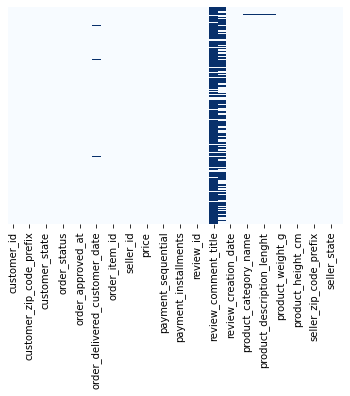

In [54]:
sns.heatmap(mergedFrame1000.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [55]:
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
nbOrders = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    uniqueOrders = np.unique(orders["order_id"].values)
    nbOrders.append(len(uniqueOrders))
mergedFrame1000["nbOrders"] = nbOrders
print(str(time.time()-start_time))

50.215008020401


- Ensure that dates are in the right format in dataframe 

In [56]:
mergedFrame1000["order_purchase_timestamp"] = pd.to_datetime(mergedFrame1000["order_purchase_timestamp"])
mergedFrame1000["order_delivered_customer_date"] = pd.to_datetime(mergedFrame1000["order_delivered_customer_date"])
mergedFrame1000["order_estimated_delivery_date"] = pd.to_datetime(mergedFrame1000["order_estimated_delivery_date"])

In [57]:
#nbOrders feature with query 
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
nbOrders = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    uniqueOrders = np.unique(orders["order_id"].values)
    nbOrders.append(len(uniqueOrders))
mergedFrame1000["nbOrders"] = nbOrders
print(str(time.time()-start_time))

51.49486804008484


### Adding order length in days

<AxesSubplot:>

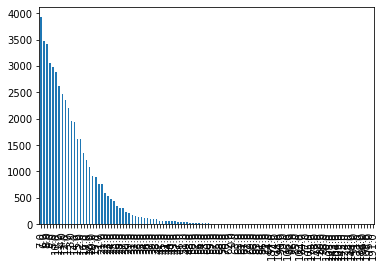

In [58]:
order_delivery_length = []


for row in mergedFrame1000.iterrows():
    #print(row[1]["order_delivered_customer_date"])
    if row[1]["order_delivered_customer_date"]:
        order_delivery_length.append(pd.Timedelta(row[1]["order_delivered_customer_date"]-row[1]["order_purchase_timestamp"]).days)
    else:
        order_delivery_length.append(-1000)
mergedFrame1000["order_delivery_length"] = order_delivery_length
mergedFrame1000["order_delivery_length"].value_counts().plot(kind="bar")

### add returningCustomer


In [59]:
#add returningCustomer
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
returningCustomer = []
for rowIndex in range(len(customerIds)):
    currentRow = mergedFrame1000.iloc[rowIndex]
    if currentRow["nbOrders"] > 1: 
        returningCustomer.append(1)
    else: 
        returningCustomer.append(0)
mergedFrame1000["returningCustomers"] = returningCustomer
print(str(time.time()-start_time))

16.298551082611084


### add orderBooleanStatus

In [60]:
#add orderBooleanStatus
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
orderStatus = []
for rowIndex in range(len(customerIds)):
    currentRow = mergedFrame1000.iloc[rowIndex]
    if currentRow["order_status"] == "delivered": 
        orderStatus.append(1)
    else: 
        orderStatus.append(0)
mergedFrame1000["orderStatusBool"] = orderStatus
print(str(time.time()-start_time))

21.72850728034973


### add NbReviews

In [61]:
#add NbReviews
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
nbReviews = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    uniqueOrders = np.unique(orders["review_id"].values)
    nbReviews.append(len(uniqueOrders))
mergedFrame1000["NbReviews"] = nbReviews
print(str(time.time()-start_time))

57.864063024520874


In [62]:
np.unique(mergedFrame1000["nbOrders"].values)

array([1, 2, 3, 4, 5, 6])

### add avgReviewScore

In [63]:
#add avgReviewScore - much faster 
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
avgReviewScore = []
for ids in customerIds: 
    orders = mergedFrame1000.loc[mergedFrame1000["customer_unique_id_int"] == ids]
    if orders["NbReviews"].values.any() & np.min(orders["NbReviews"].values) >=1: 
        avgScore = np.average(orders["review_score"].values)
        avgReviewScore.append(avgScore)
    else: 
        avgReviewScore.append(0)
mergedFrame1000["avgReviewScore"] = avgReviewScore
print(str(time.time()-start_time))

63.18549990653992


# Etape 3
### Dates Engeenering
- adding if an order is late or not 
- adding how many days late is an order.
- year order date

In [64]:
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id_int"].values
orderLateBool = []
orderLateInDays = []
for row in mergedFrame1000.iterrows():
    orderLate  = pd.Timedelta(row[1]["order_delivered_customer_date"]- row[1]["order_estimated_delivery_date"]).days
    if orderLate <= 0: 
        orderLateBool.append(0)
        orderLateInDays.append(orderLate)
    else: 
        orderLateBool.append(1)
        orderLateInDays.append(orderLate)
mergedFrame1000['year'] = mergedFrame1000['order_purchase_timestamp'].dt.year
mergedFrame1000["orderLateInDays"] = orderLateInDays
mergedFrame1000["orderLateBool"] = orderLateBool
print(str(time.time()-start_time))

8.52038311958313


In [65]:
# retrieve dataframe from previous step 
#mergedFrame1000 = pd.read_csv("../DataSet/engineeredFrame.csv")
mergedFrame1000.filter(items=["orderLateBool", "year", "orderLateInDays", "order_estimated_delivery_date", "order_delivered_customer_date"])

,orderLateBool,year,orderLateInDays,order_estimated_delivery_date,order_delivered_customer_date
83934,0,2018,-15.0,2018-06-01,2018-05-17 20:48:43
56115,0,2018,-10.0,2018-08-16,2018-08-06 15:46:45
15194,0,2017,-13.0,2017-04-03,2017-03-21 13:14:16
38936,0,2018,-11.0,2018-03-09,2018-02-26 20:26:45
69722,0,2018,-12.0,2018-08-22,2018-08-10 15:32:34
...,...,...,...,...,...
15783,0,2018,-31.0,2018-03-01,2018-01-29 23:12:09
60710,0,2017,-9.0,2017-12-07,2017-11-28 21:47:40
95836,0,2018,-19.0,2018-04-04,2018-03-16 21:08:42
33660,0,2018,-7.0,2018-08-01,2018-07-25 16:29:07


<AxesSubplot:>

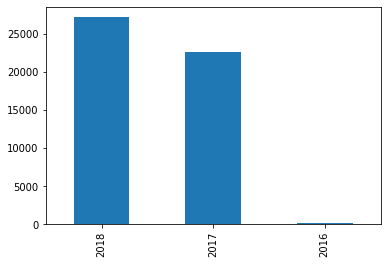

In [66]:
mergedFrame1000["year"].value_counts().plot(kind="bar")
                                            #,color=mergedFrame1000.get("product_category_nameEnc"))

# Etape 4
### Création d'un dataset d'orchestration

In [76]:
nonNullRate = []
for col in mergedFrame1000.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(mergedFrame1000[col].dtypes) ,"filledRatio": round((mergedFrame1000[col].count()/mergedFrame1000.shape[0])*100, 3), "nbValues": mergedFrame1000[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 10]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] >1]

moreThanOnePercentColumns = moreThanOnePercentColumns.sort_values(by=["filledRatio"], ascending=False)
#plt.bar(moreThanOnePercentColumns["columns"].values, moreThanOnePercentColumns['filledRatio'].values)
stringColumn = moreThanOnePercentColumns[moreThanOnePercentColumns["type"] == "object"]
intColumn = moreThanOnePercentColumns[moreThanOnePercentColumns["type"] == "int64"]
floatColumn = moreThanOnePercentColumns[moreThanOnePercentColumns["type"] == "float64"]

stringColumn = stringColumn[stringColumn["nbValues"] < 100]
categorialsValues = moreThanOnePercentColumns[moreThanOnePercentColumns["nbValues"] < 100]
categorialsValues = categorialsValues[categorialsValues["type"] == "object"]
categorialsValues

,columns,type,filledRatio,nbValues
36,seller_state,object,100.000,21
4,customer_state,object,100.000,27
6,order_status,object,100.000,7
19,payment_type,object,100.000,4
26,product_category_name,object,98.622,73


# Etape 5 
### Label Encoder sur les variables categorielles de type string. 

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
newCols = []
for column in stringColumn["columns"].values:
    newCol = column+"Enc"
    print(newCol)
    mergedFrame1000[newCol] = encoder.fit_transform(mergedFrame1000[column].values)
    #mergedFrame1000[newCol].value_counts().plot(kind="bar")
    newCols.append(newCol)
newCols

seller_stateEnc
payment_typeEnc
customer_stateEnc
order_statusEnc
product_category_nameEnc


['seller_stateEnc',
 'payment_typeEnc',
 'customer_stateEnc',
 'order_statusEnc',
 'product_category_nameEnc']

# Etape 6 
### Mise à jour du dataframe d'orchestration. 

In [87]:
#update with encoded columns
nonNullRate = []
for col in mergedFrame1000.columns: 
    nonNullRate.append({"columns": col, "type": str(mergedFrame1000[col].dtypes) ,"filledRatio": round((mergedFrame1000[col].count()/mergedFrame1000.shape[0])*100, 3), "nbValues": mergedFrame1000[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] >1]



filterC = newCols + list(intColumn["columns"].values) 
filterC  = filterC + list(floatColumn["columns"].values)
#filterC  = filterC + ["customer_zip_code_prefix"]
print(filterC)
filterC.remove("order_item_id")
toDrop = ["product_weight_g",
 'product_length_cm',
 'product_height_cm', "seller_stateEnc", 
 'product_width_cm', "order_statusEnc", "payment_installments", "customer_unique_id_int", 
 "customer_zip_code_prefix", 
          "freight_value", "payment_value", 
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty', "seller_zip_code_prefix"]

for drop in toDrop:
    print(drop)
    filterC.remove(drop)
    
print("filterC", filterC, "filterC length", len(filterC))


isFilter = []

for column in moreThanOnePercentColumns["columns"].values:
    if column in filterC:
        isFilter.append(True)
    else: 
        isFilter.append(False)
        
moreThanOnePercentColumns["isFilter"] = isFilter

['seller_stateEnc', 'payment_typeEnc', 'customer_stateEnc', 'order_statusEnc', 'product_category_nameEnc', 'returningCustomers', 'seller_zip_code_prefix', 'customer_unique_id_int', 'nbOrders', 'orderStatusBool', 'NbReviews', 'year', 'orderLateBool', 'seller_stateEnc', 'payment_typeEnc', 'customer_stateEnc', 'order_statusEnc', 'review_score', 'product_category_nameEnc', 'customer_zip_code_prefix', 'order_item_id', 'payment_installments', 'payment_sequential', 'avgReviewScore', 'payment_value', 'price', 'freight_value', 'product_weight_g', 'product_width_cm', 'product_length_cm', 'product_height_cm', 'product_photos_qty', 'product_description_lenght', 'product_name_lenght', 'orderLateInDays', 'order_delivery_length']
product_weight_g
product_length_cm
product_height_cm
seller_stateEnc
product_width_cm
order_statusEnc
payment_installments
customer_unique_id_int
customer_zip_code_prefix
freight_value
payment_value
product_name_lenght
product_description_lenght
product_photos_qty
seller_zip

### Etape 7 Traitement des outliers

['payment_typeEnc', 'customer_stateEnc', 'product_category_nameEnc', 'review_score', 'nbOrders', 'returningCustomers', 'orderStatusBool', 'NbReviews', 'year', 'orderLateBool', 'payment_sequential', 'avgReviewScore', 'price', 'order_delivery_length', 'orderLateInDays']


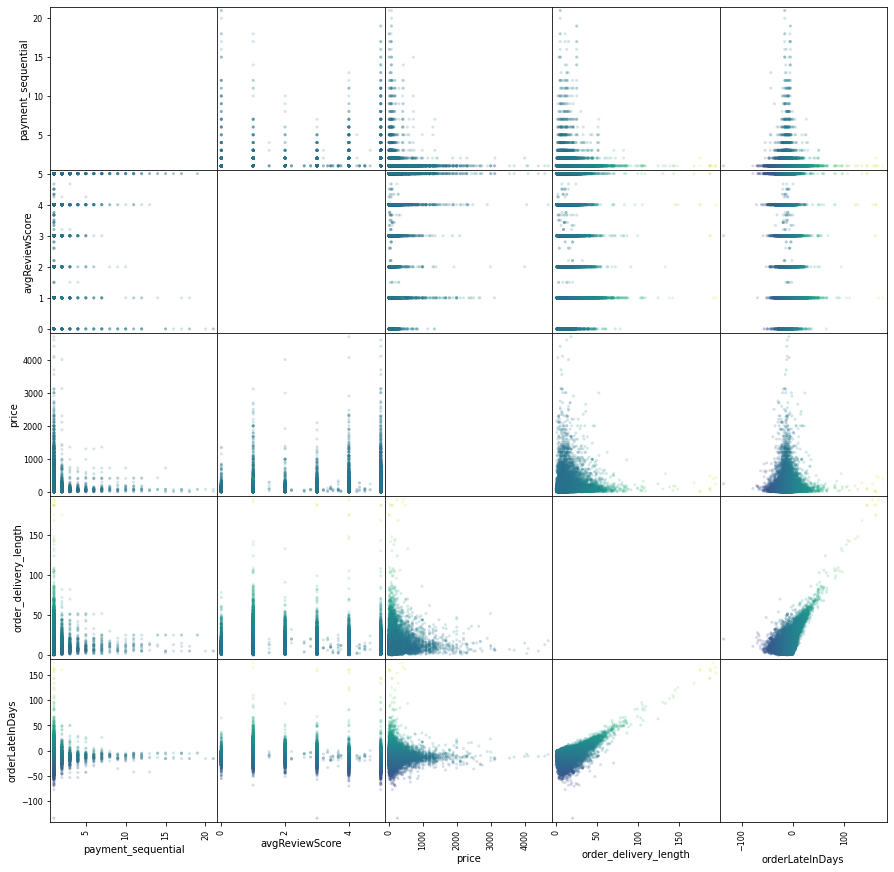

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [79]:
#plt.figure(figsize=(40,40))
print(filterC)
frameCopy = mergedFrame1000.dropna().copy()
figure = pd.plotting.scatter_matrix(frameCopy.filter(items=filterC[10:]), 
                           alpha=0.2, 
                           diagonal={"kde"}, 
                           grid=True, 
                           c=frameCopy['orderLateInDays'].values, 
                           figsize=(15,15))
plt.show()

/Users/benjamindeplus/.local/share/virtualenvs/OlistC-zOM6riVT/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/benjamindeplus/.local/share/virtualenvs/OlistC-zOM6riVT/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/benjamindeplus/.local/share/virtualenvs/OlistC-zOM6riVT/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='payment_typeEnc', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='customer_stateEnc', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='product_category_nameEnc', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='review_score', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='nbOrders', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='returningCustomers', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='orderStatusBool', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='NbReviews', ylabel='payment_typeEnc'>,
        <AxesSubplot:xlabel='year', ylabel='payment_typeEnc'>],
       [<AxesSubplot:xlabel='payment_typeEnc', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='customer_stateEnc', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='product_category_nameEnc', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='review_score', ylabel='customer_stateEnc'>,
        <AxesSubplot:xlabel='nbOrd

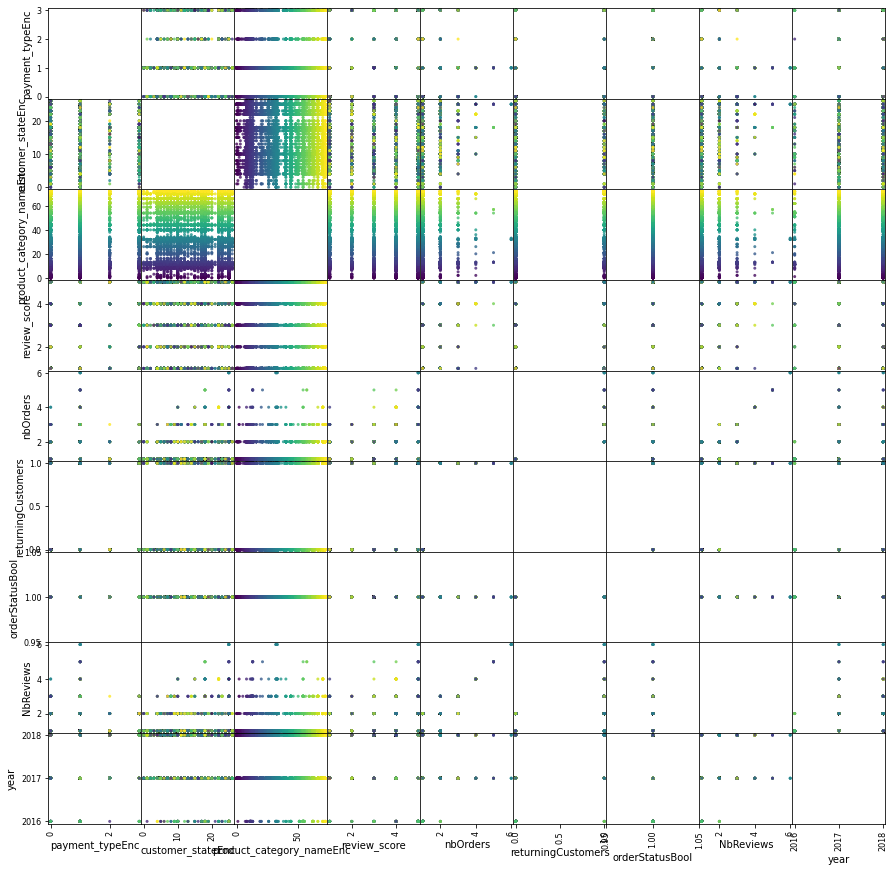

In [81]:
frameCopy = mergedFrame1000.dropna().copy()
pd.plotting.scatter_matrix(frameCopy.filter(items=filterC[0:9]), 
                           alpha=0.8, 
                           diagonal={"hist"}, 
                           grid=True, 
                           c=frameCopy['product_category_nameEnc'].values, 
                           figsize=(15,15))

<AxesSubplot:>

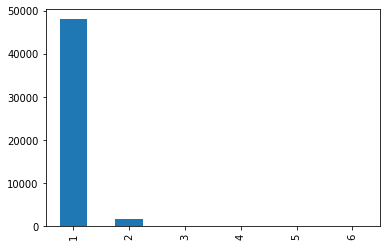

In [86]:
mergedFrame1000["nbOrders"].value_counts().plot(kind="bar")

# Etape 8 
### Export Current Dataframe and orchestration Frame

In [88]:

mergedFrame1000 = mergedFrame1000[mergedFrame1000["price"] < 2000]
mergedFrame1000 = mergedFrame1000[mergedFrame1000["payment_sequential"] < 24]
#mergedFrame1000 = mergedFrame1000.drop(columns=["review_comment_message", "review_comment_title"])

mergedFrame1000.to_csv("../DataSet/engineeredFrame.csv", index=False, sep=";", decimal=".")
moreThanOnePercentColumns.to_csv("../DataSet/filterFrame.csv", index=False, sep=";", decimal=".")